In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('creditcard.csv')

In [3]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable (fraud or not)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [8]:
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
isolation_forest.fit(X_resampled)

IsolationForest(contamination=0.01, random_state=42)

In [11]:
y_pred_anomaly = isolation_forest.predict(X_test)

# Convert predictions to binary labels (1 for normal, -1 for fraud)


In [12]:
y_pred_anomaly_binary = [1 if x == 1 else 0 for x in y_pred_anomaly]

# Classification using Random Forest


In [13]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_resampled, y_resampled)

# Predict the labels for the test set


RandomForestClassifier(random_state=42)

In [15]:
y_pred_classification = random_forest.predict(X_test)

# Evaluate the Isolation Forest model


In [16]:
print("Isolation Forest:")
print(confusion_matrix(y_test, y_pred_anomaly_binary))
print(classification_report(y_test, y_pred_anomaly_binary))

# Evaluate the Random Forest model
print("\nRandom Forest:")
print(confusion_matrix(y_test, y_pred_classification))
print(classification_report(y_test, y_pred_classification))

Isolation Forest:
[[   10 56854]
 [    3    95]]
              precision    recall  f1-score   support

           0       0.77      0.00      0.00     56864
           1       0.00      0.97      0.00        98

    accuracy                           0.00     56962
   macro avg       0.39      0.48      0.00     56962
weighted avg       0.77      0.00      0.00     56962


Random Forest:
[[56863     1]
 [   22    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.78      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



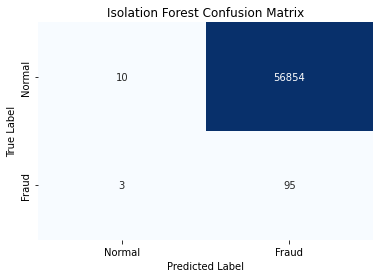

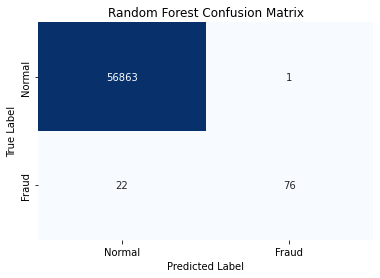

In [17]:
conf_matrix_anomaly = confusion_matrix(y_test, y_pred_anomaly_binary)

# Confusion matrix for Random Forest
conf_matrix_classification = confusion_matrix(y_test, y_pred_classification)

# Plot confusion matrix for Isolation Forest
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_anomaly, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title('Isolation Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_classification, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()